In [2]:
import matplotlib.pyplot as plt


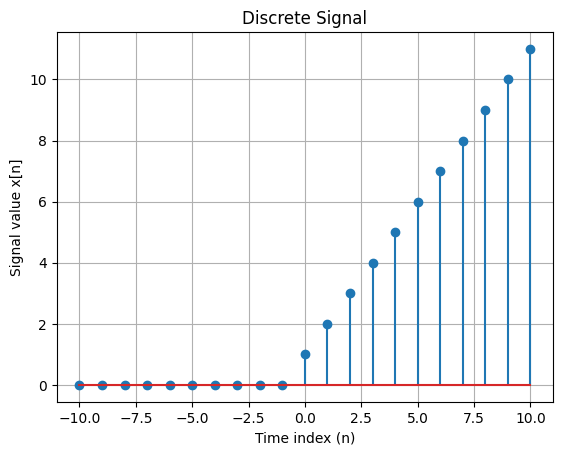

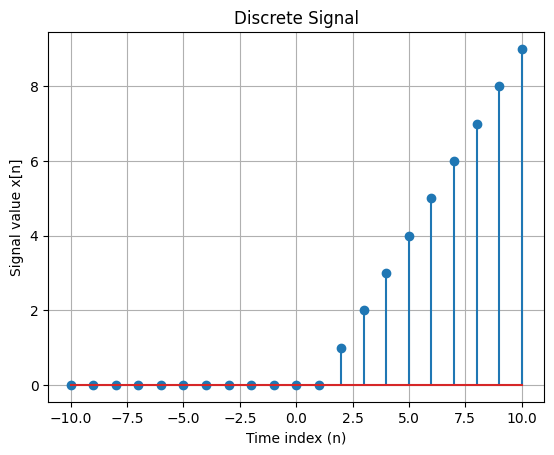

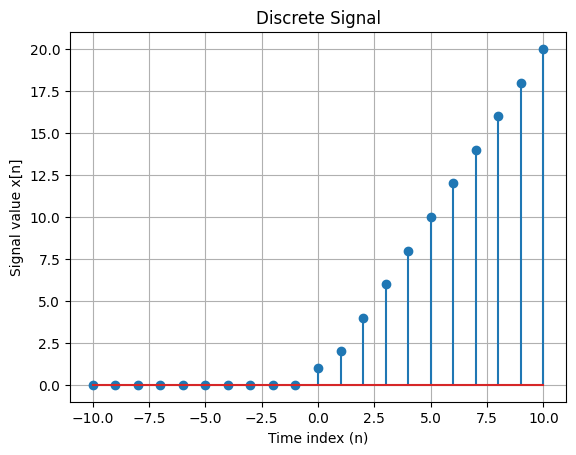

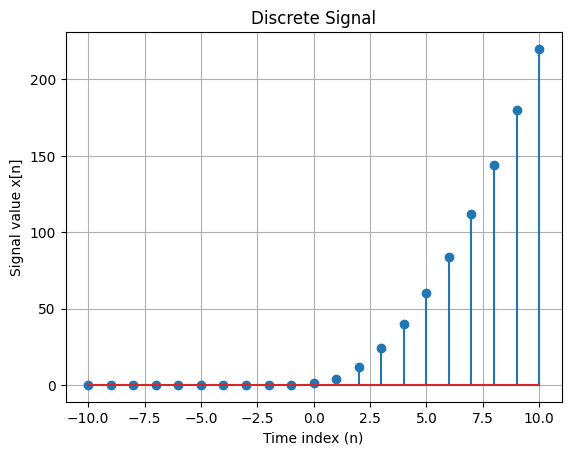

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class DiscreteSignal:
    def __init__(self, INF):
        self.INF = INF
        self.values = np.zeros(2 * INF + 1)  # Signal values are initialized to zero

    def set_value_at_time(self, time, value):
        index = time + self.INF  # Shift time to handle negative indices
        if 0 <= index < len(self.values):
            self.values[index] = value
        # else:
        #     raise ValueError("Time index is out of range.")

    def shift_signal(self, shift):
        # """Return a new signal instance with a shifted signal x[n - shift]."""
        new_signal = DiscreteSignal(self.INF)
        for i in range(-self.INF, self.INF + 1):
            index = i+shift
            if -self.INF <= index <= self.INF:
                new_signal.set_value_at_time(i, self.values[index + self.INF])
        return new_signal

    def add(self, other):
        # """Add two discrete signals and return the result."""
        if len(self.values) != len(other.values):
            raise ValueError("Signals must have the same length.")
        new_signal = DiscreteSignal(self.INF)
        new_signal.values = self.values + other.values
        return new_signal

    def multiply(self, other):
        # """Multiply two discrete signals element-wise and return the result."""
        if len(self.values) != len(other.values):
            raise ValueError("Signals must have the same length.")
        new_signal = DiscreteSignal(self.INF)
        new_signal.values = self.values * other.values
        return new_signal

    def multiply_const_factor(self, scaler):
        # """Multiply the signal by a constant factor and return the result."""
        new_signal = DiscreteSignal(self.INF)
        new_signal.values = self.values * scaler
        return new_signal

    def plot(self,title="Discrete Signal"):
        time = np.arange(-self.INF, self.INF + 1)
        plt.stem(time, self.values)
        plt.title(title)
        plt.xlabel('Time index (n)')
        plt.ylabel('Signal value x[n]')
        plt.grid(True)
        plt.show()
def main():
    signal = DiscreteSignal(10)
    for i in range(-10, 11):
        signal.set_value_at_time(abs(i), i+1)
    signal.plot()
    shifted_signal = signal.shift_signal(-2)
    shifted_signal.plot()
    added_signal = signal.add(shifted_signal)
    added_signal.plot()
    multiplied_signal = signal.multiply(added_signal)
    multiplied_signal.plot()
if __name__ == "__main__":
    main()


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class ContinuousTimeSignal:
    def __init__(self,func):
        self.func = func
    def shift(self,shift):
        new_signal = lambda t:self.func(t-shift)
        return ContinuousTimeSignal(new_signal)
    def add(self,other):
        new_signal = lambda t:self.func(t)+other.func(t)
        return ContinuousTimeSignal(new_signal)
    def multiply(self,other):
        new_signal = lambda t:self.func(t)*other.func(t)
        return ContinuousTimeSignal(new_signal)
    def multiply_const_factor(self,scaler):
        new_signal = lambda t:self.func(t)*scaler
        return ContinuousTimeSignal(new_signal)
    def plot(self, t_min, t_max,title="Continous Time Signal"):
        t = np.linspace(t_min, t_max, 1000)  # Generate time values
        y = self.func(t)  # Get the signal values over the time range
        plt.plot(t, y)
        plt.title(title)
        plt.xlabel('Time (t)')
        plt.ylabel('Signal value x(t)')
        plt.grid(True)
        plt.show()
def main():
    func_sin = lambda t:np.sin(t)
    ContinuousTimeSignal_sin = ContinuousTimeSignal(func_sin)
    ContinuousTimeSignal_sin.plot(-2*np.pi,2*np.pi)
    ContinuousTimeSignal_sin_shifted = ContinuousTimeSignal_sin.shift(np.pi/2)
    ContinuousTimeSignal_sin_shifted.plot(-2*np.pi,2*np.pi)
if __name__ == "__main__":
    main()

ImportError: DLL load failed while importing _cext: The specified module could not be found.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
class DiscreteSignal:
    def __init__(self, INF):
        self.INF = INF
        self.values = np.zeros(2 * INF + 1)  # Signal values are initialized to zero

    def set_value_at_time(self, time, value):
        index = time + self.INF  # Shift time to handle negative indices
        if 0 <= index < len(self.values):
            self.values[index] = value
        # else:
        #     raise ValueError("Time index is out of range.")

    def shift_signal(self, shift):
        # """Return a new signal instance with a shifted signal x[n - shift]."""
        new_signal = DiscreteSignal(self.INF)
        for i in range(-self.INF, self.INF + 1):
            index = i+shift
            if -self.INF <= index <= self.INF:
                new_signal.set_value_at_time(i, self.values[index + self.INF])
        return new_signal

    def add(self, other):
        # """Add two discrete signals and return the result."""
        if len(self.values) != len(other.values):
            raise ValueError("Signals must have the same length.")
        new_signal = DiscreteSignal(self.INF)
        new_signal.values = self.values + other.values
        return new_signal

    def multiply(self, other):
        # """Multiply two discrete signals element-wise and return the result."""
        if len(self.values) != len(other.values):
            raise ValueError("Signals must have the same length.")
        new_signal = DiscreteSignal(self.INF)
        new_signal.values = self.values * other.values
        return new_signal

    def multiply_const_factor(self, scaler):
        # """Multiply the signal by a constant factor and return the result."""
        new_signal = DiscreteSignal(self.INF)
        new_signal.values = self.values * scaler
        return new_signal

    def plot(self,title="Discrete Signal"):
        time = np.arange(-self.INF, self.INF + 1)
        plt.stem(time, self.values)
        plt.title(title)
        plt.xlabel('Time index (n)')
        plt.ylabel('Signal value x[n]')
        plt.grid(True)
        plt.show()


class DiscreteLTI:
    def __init__(self,impulse_response):
        self.impulse_response = impulse_response
    def linear_combination_of_impulses(self,input_signal):
        impulses = []
        coefficients = []
        for n,value in enumerate(input_signal.values):
            # if value!=0:
            impulse = DiscreteSignal(input_signal.INF)
            impulse.set_value_at_time(n-input_signal.INF,value!=0)
            # impulse.plot()
            impulses.append(impulse)
            coefficients.append(value)
        # for i in range(-input_signal.INF,input_signal.INF+1):
        #     if input_signal[i+input_signal.INF]!=0:
        #         impulse = DiscreteSignal(input_signal.INF)
        #         impulse.set_value_at_time(i,1)
        #         # impulse.plot()
        #         impulses.append(impulse)
        #         coefficients.append(input_signal.values[i+input_signal.INF])
        return impulses,coefficients
    
    def output(self,input_signal):
        impulses,coefficients = self.linear_combination_of_impulses(input_signal)
        output_signal = DiscreteSignal(input_signal.INF)
        for i ,impulse in enumerate(impulses):
            shifted_impulse = self.impulse_response.shift_signal(input_signal.INF-i)
            # shifted_impulse = self.impulse_response.shift_signal(i)
            output_signal = output_signal.add(shifted_impulse.multiply_const_factor(coefficients[i]))
            # if i >=5:
            #     shifted_impulse.multiply_const_factor(coefficients[i]).plot()
                # output_signal.plot()
        return output_signal
def main():
    impulse_response = DiscreteSignal(5)
    # impulse_response.set_value_at_time(-1,3)
    # impulse_response.set_value_at_time(0,2)
    # impulse_response.set_value_at_time(1,1)
    impulse_response.set_value_at_time(0,1)
    impulse_response.set_value_at_time(1,1)
    impulse_response.set_value_at_time(2,1)
    impulse_response.plot("Impulse Response")
    lti = DiscreteLTI(impulse_response)
    input_signal = DiscreteSignal(5)
    # input_signal.set_value_at_time(0,2)
    # input_signal.set_value_at_time(1,3)
    # input_signal.set_value_at_time(2,4)
    input_signal.set_value_at_time(0,0.5)
    input_signal.set_value_at_time(1,2)
    input_signal.plot("Input Signal")
    output_signal = lti.output(input_signal)
    output_signal.plot("Output Signal")
if __name__ == "__main__":
    main()

ImportError: DLL load failed while importing _cext: The specified module could not be found.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class ContinuousTimeSignal:
    def __init__(self,func):
        self.func = func
    def shift(self,shift):
        new_signal = lambda t:self.func(t-shift)
        return ContinuousTimeSignal(new_signal)
    def add(self,other):
        new_signal = lambda t:self.func(t)+other.func(t)
        return ContinuousTimeSignal(new_signal)
    def multiply(self,other):
        new_signal = lambda t:self.func(t)*other.func(t)
        return ContinuousTimeSignal(new_signal)
    def multiply_const_factor(self,scaler):
        new_signal = lambda t:self.func(t)*scaler
        return ContinuousTimeSignal(new_signal)
    # def plot(self, t_min, t_max,title="Continous Time Signal"):
    #     t = np.linspace(t_min, t_max, 1000)  # Generate time values
    #     y = self.func(t)  # Get the signal values over the time range
    #     plt.plot(t, y)
    #     plt.title(title)
    #     plt.xlabel('Time (t)')
    #     plt.ylabel('Signal value x(t)')
    #     plt.grid(True)
    #     plt.show()
    # def plot(self, t_min, t_max, title="Continuous Time Signal", other_signal=None, other_label="Other Signal",mainlabel=r"$y_{approx}(t)$"):
    #     t = np.linspace(t_min, t_max, 1000)  # Generate time values
    #     y = self.func(t)  # Get the signal values over the time range

    #     plt.plot(t, y, label=mainlabel)

    #     # If another signal is provided, plot it on the same graph
    #     if other_signal:
    #         other_y = other_signal.func(t)
    #         plt.plot(t, other_y, label=other_label)

    #     plt.title(title)
    #     plt.xlabel('t (Time)')
    #     plt.ylabel('x(t)')
    #     plt.grid(True)
    #     plt.legend()
    #     plt.show()
    def plot(self, t_min, t_max, title="Continuous Time Signal", other_signal=None, other_label="Other Signal", mainlabel=r"$y_{approx}(t)$", ax=None):
        """
        Plot the signal on the provided axis (ax) or create a new plot if no axis is provided.
        """
        t = np.linspace(t_min, t_max, 1000)  # Generate time values
        y = self.func(t)  # Get the signal values over the time range

        # If no axis is provided, create a new plot
        if ax is None:
            ax = plt.gca()  # Get the current axis or create a new one if it doesn't exist

        # Plot the main signal
        ax.plot(t, y, label=mainlabel)

        # If another signal is provided, plot it on the same graph
        if other_signal:
            other_y = other_signal.func(t)
            ax.plot(t, other_y, label=other_label)

        # Set titles and labels
        ax.set_title(title)
        ax.set_xlabel('t (Time)')
        ax.set_ylabel('x(t)')
        ax.grid(True)
        ax.legend()


class ContinuousLTI:
    def __init__(self,impulse_response):
        self.impulse_response = impulse_response

    def linear_combination_of_impulses(self,input_signal,delta):
        # Implementation needed
        impulses = []
        coefficients = []
        t_vals = np.arange(-5,5,delta)
        for t in t_vals:
            coefficient = input_signal.func(t)*delta
            if(coefficient!=0):
                # impulse = ContinuousTimeSignal(lambda x, t=t: self.impulse_response.func(x - t))
                impulses.append(t)
                coefficients.append(coefficient)
        return impulses,coefficients

    def output_approx(self,input_signal,delta):
        # Implementation needed
        impulses,coefficients = self.linear_combination_of_impulses(input_signal,delta)
        output_signal = ContinuousTimeSignal(lambda x:0)
        for i,impulse in enumerate(impulses):
            shifted_impulse = self.impulse_response.shift(impulse)
            output_signal = output_signal.add(shifted_impulse.multiply_const_factor(coefficients[i]))
        return output_signal
def main():
    # Define the impulse response h(t) = -2t + 4 when t < 2, 0 otherwise
    impulse_response = ContinuousTimeSignal(lambda t: 1 & (t>=0))

    input_signal = ContinuousTimeSignal(lambda t: np.exp(-t) * (t >= 0))

    # input_signal.plot(t_min=-5, t_max=5, title="Input Signal x(t)")
    # impulse_response.plot(t_min=-5, t_max=5, title="Impulse Response h(t)")

    # print("Impulse Response h(t):")
    # impulse_response.plot(t_min=-5, t_max=5, title="Impulse Response h(t)")

    # print("Input Signal x(t):")
    # input_signal.plot(t_min=-5, t_max=5, title="Input Signal x(t)")

    lti_system = ContinuousLTI(impulse_response)


    output_original = ContinuousTimeSignal(lambda t: (1-np.exp(-t))*(t>=0))

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # print("Output Signal y(t):")
    output_signal1 = lti_system.output_approx(input_signal, delta=0.5)
    output_signal1.plot(t_min=-2, t_max=5, title=r"$\nabla$ = 0.5",other_signal=output_original, other_label=r"y(t)=$1-e^{-t}u(t)$",ax=axs[0, 0])
    
    output_signal2 = lti_system.output_approx(input_signal, delta=0.1)
    output_signal2.plot(t_min=-2, t_max=5, title=r"$\nabla$ = 0.1",other_signal=output_original, other_label=r"y(t)=$1-e^{-t}u(t)$",ax=axs[0, 1])
    
    output_signal3 = lti_system.output_approx(input_signal, delta=0.05)
    output_signal3.plot(t_min=-2, t_max=5, title=r"$\nabla$ = 0.05",other_signal=output_original, other_label=r"y(t)=$1-e^{-t}u(t)$",ax=axs[1, 0])

    output_signal4 = lti_system.output_approx(input_signal, delta=0.01)
    output_signal4.plot(t_min=-2, t_max=5, title=r"$\nabla$ = 0.01",other_signal=output_original, other_label=r"y(t)=$1-e^{-t}u(t)$",ax=axs[1, 1])
    
if __name__ == "__main__":
    main()
    


In [ ]:
from typing import List
def naam_na_jana_func(li:List[str])->dict:
    d = {}
    for i in range(len(li)):
        d[i] = li[i]
    return d
def divide_numbers(a:int,b:int)->float:
    try:
        res = a/b
        return res
    except Exception as e:
        print(e)
    
# li = ["a","b","c"]
# print(naam_na_jana_func(li))
print(divide_numbers(1,0))
print(divide_numbers(1,2))
